In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy import optimize
from scipy.optimize import curve_fit


In [2]:
x =np.array( [ 1.,   1.5,  2.,   2.5,  3.,   3.5,  4.,   4.5,  5.,   5.5,  6.,   6.5,  7.,   7.5, 8.,   8.5,  9.,   9.5, 10. ])
y =np.array( [3.43, 4.94, 6.45, 9.22, 6.32, 6.11, 4.63, 8.95, 7.8, 8.35, 11.45, 14.71, 11.97, 12.46, 17.42, 17.0, 15.45, 19.15, 20.86])

# 1. Fit a linear curve to the data


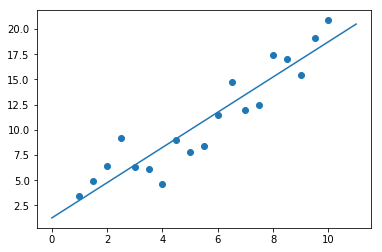

In [3]:
coefficients = np.polyfit(x, y, 1) 
p = np.poly1d(coefficients)
t=np.linspace(0,11,150)

plt.scatter(x,y)
plt.plot(t,p(t),'-')
plt.show()


# 2. Fit a cubic curve using the SciPy library  


[-4.77843452e-04  1.49438302e-01  1.54461198e-01  4.52517028e+00]


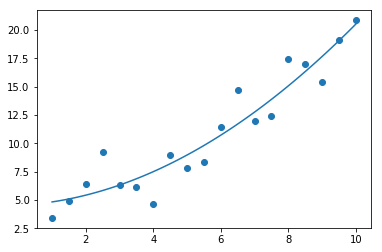

In [4]:
def func(x, a, b, c,d):
...     return a*(x**3)+b*(x**2)+c*(x)+d


params, params_covariance = curve_fit(func,x,y)

print(params)
plt.scatter(x,y)
plt.plot(np.linspace(x[0],x[-1],100),func(np.linspace(x[0],x[-1],100),*params))

# 3. Find the area underneath the cubic curve over the domain of the data using the tools in SciPy


In [5]:
params
from scipy import integrate
a=params[0]
b=params[1]
c=params[2]
d=params[3],
x3=lambda x,a,b,c,d: a*(x**3)+b*(x**2)+c*(x)+d
Area=integrate.quad(func, x[0], x[-1],args=(a,b,c,d))

So the Area is 96.94082706157427

# 4. Plot the data, the linear fit, and the cubic fit in Matplotlib.  Make sure to give the plot a title and an x and y label. Save this figure and include it in your pull request!
# 5. Put the area of the curve on the plot somewhere as text using Matplotlib

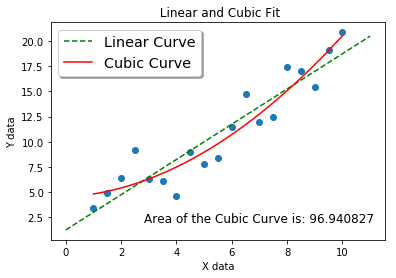

In [6]:
fig=plt.figure()
plt.scatter(x,y)
plt.plot(t,p(t),'g--',label="Linear Curve")
plt.plot(np.linspace(x[0],x[-1],100),func(np.linspace(x[0],x[-1],100),*params),'r', label='Cubic Curve')
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.title(" Linear and Cubic Fit")
plt.xlabel("X data")
plt.ylabel("Y data")
alignment = {'horizontalalignment': 'center', 'verticalalignment': 'baseline'}
plt.text(7, 2, 'Area of the Cubic Curve is: %f'%Area[0], size='large', **alignment)
fig.savefig('Beyucel_fig_q4.pdf')

# 6. Use the Bayesian information criterion to justify which model (linear or cubic) is preferable.  Include this justification in your journal entry for the week.


I will calculate the error values and BIC values to compare both model.

In [7]:
"""it is obvious that cubic will have less eror ,beacues it already has the linear term in it.
But using higher order tems might create overfitting problem"""
ErrorLinear = sum((y-p(x))**2)
ErrorCubic =  sum((y-func(x,a,b,c,d))**2) 
print("Error for linear curve is :",ErrorLinear ,"\nError for Cubic curve is :",ErrorCubic)

Error for linear curve is : 67.51609403508773 
Error for Cubic curve is : 50.52570157479262


In [8]:

#here's a function that implements it#here's  
def BIC(y, yhat, k, weight = 1):
    err = y - yhat
    sigma = np.std(np.real(err))
    n = len(y)
    B = n*np.log(sigma**2) + weight*k*np.log(n)
    return B


BIC_linear=BIC(y,p(x),2)
BIC_cubic =BIC(y,func(x,a,b,c,d),4)
print("BIC for linear curve is :",BIC_linear ,"\nBIC for Cubic curve is :",BIC_cubic)

BIC for linear curve is : 29.97949134672216 
BIC for Cubic curve is : 30.360576141400536
